In [62]:
import sys
sys.path.append("/home/wbc/code/HMcode-python/hmcode/pyhalomodel")
from pyhalomodel import pyhalomodel as hm
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("/home/wbc/code/HMcode-python/hmcode/CAMELSconcentration")
from Interpolator import CvirModel, avail_sims
sys.path.append("/home/wbc/code/HMcode-python/hmcode/cmnew")
from cmnew import c_m_correct

In [63]:
M = np.logspace(8,16,80)

In [64]:
Mvir = 10**np.linspace(11, 14.5, 50) #in units of Msun/h

model = CvirModel(sim = 'DMO') #This loads + organizes the model parameters (KLLR slopes/intercepts)
mean  = model.predict(Mvir, z = 0, Omega_m = 0.3, sigma_8 = 0.85, SN1 = 1, AGN1 = 1, SN2 = 1, AGN2 = 1)
mean = np.mean(mean, axis = 0)

model2 = CvirModel(sim = 'TNG') #This loads + organizes the model parameters (KLLR slopes/intercepts)
mean2 = model2.predict(Mvir, z = 0, Omega_m = 0.3, sigma_8 = 0.85, SN1 = 1, AGN1 = 1, SN2 = 1, AGN2 = 1)
mean2 = np.mean(mean2, axis = 0)

In [65]:
c_ = mean
c__ = mean2

In [66]:
c_correct = c_m_correct.c_correct(M, z = 0, om = 0.3, s8 = 0.85, sn1=1, agn1=1, sn2=1, agn2=1)
c_correct2 = c_m_correct.c_correct(M, z = 0, sim='TNG', om = 0.3, s8 = 0.85, sn1=1, agn1=1, sn2=1, agn2=1)

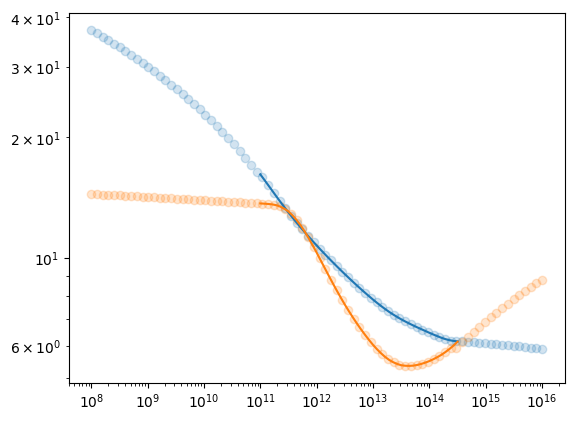

In [67]:
#plt.plot(M,c)
plt.scatter(M,c_correct, alpha=0.2)
plt.scatter(M, c_correct2, alpha=0.2)
plt.plot(Mvir,c_)
plt.plot(Mvir,c__)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [68]:
slope_ = [(c__[i+1]-c__[i])/(np.log10(Mvir[i+1])-np.log10(Mvir[i])) for i in range(len(c_)-1)]

In [69]:
slope_slope_ = [(slope_[i+1]-slope_[i])/(np.log10(Mvir[i+1])-np.log10(Mvir[i])) for i in range(len(slope_)-1)]

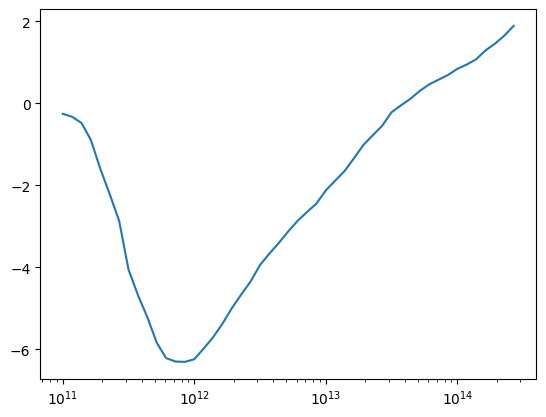

In [70]:
plt.plot(Mvir[:-1], slope_)
plt.xscale('log')

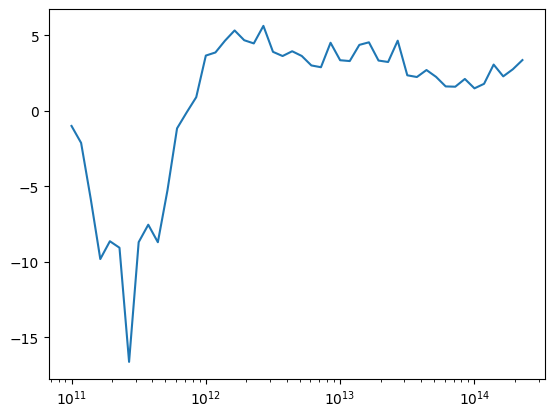

In [71]:
plt.plot(Mvir[:-2], slope_slope_)
plt.xscale('log')

In [80]:
len(Mvir)-len(slope_slope_)

2

In [84]:
mask = np.array(slope_slope_) >= 0
Mvir[1:-1][mask]

array([1.00000000e+12, 1.17876863e+12, 1.38949549e+12, 1.63789371e+12,
       1.93069773e+12, 2.27584593e+12, 2.68269580e+12, 3.16227766e+12,
       3.72759372e+12, 4.39397056e+12, 5.17947468e+12, 6.10540230e+12,
       7.19685673e+12, 8.48342898e+12, 1.00000000e+13, 1.17876863e+13,
       1.38949549e+13, 1.63789371e+13, 1.93069773e+13, 2.27584593e+13,
       2.68269580e+13, 3.16227766e+13, 3.72759372e+13, 4.39397056e+13,
       5.17947468e+13, 6.10540230e+13, 7.19685673e+13, 8.48342898e+13,
       1.00000000e+14, 1.17876863e+14, 1.38949549e+14, 1.63789371e+14,
       1.93069773e+14, 2.27584593e+14, 2.68269580e+14])